<a href="https://colab.research.google.com/github/cml096/GoogleColabRepo/blob/master/cristobal/Data-02/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
import pandas as pd
df = pd.read_excel('OperTot - PowerView_ARCH1.xlsx')

In [155]:
list_drop = ['ID','shiftindex','crew#','unit#','tmcat08','tmcat09','tmcat10','tmcat11','tmcat12','tmcat13','tmcat14','tmcat15','tmcat16','tmcat17','tmcat18','tmcat19']
df.drop(list_drop,axis=1,inplace=True)

In [156]:
df["shift#"] = df["shift#"].astype(str)
df.totaltons = df.totaltons.astype(int)

In [157]:
df_palas = df[df.unit == 'Pala']

In [158]:
df_palas.columns

Index(['shiftdate', 'shift#', 'start', 'crew', 'eqmtid', 'logintime', 'locid',
       'operid', 'totaltime', 'pit', 'unit', 'totalloads', 'totaltons',
       'loadtime', 'idletime', 'spottime', 'loadcnt', 'tmcat00', 'tmcat01',
       'tmcat02', 'tmcat03', 'tmcat04', 'tmcat05', 'tmcat06', 'tmcat07'],
      dtype='object')

In [159]:
palas = df_palas.groupby(['shiftdate','shift#','eqmtid']).sum().reset_index().sort_values('shiftdate')

In [160]:
palas = pd.DataFrame(palas)

In [161]:
palas.columns

Index(['shiftdate', 'shift#', 'eqmtid', 'start', 'logintime', 'totaltime',
       'totalloads', 'totaltons', 'loadtime', 'idletime', 'spottime',
       'loadcnt', 'tmcat00', 'tmcat01', 'tmcat02', 'tmcat03', 'tmcat04',
       'tmcat05', 'tmcat06', 'tmcat07'],
      dtype='object')

In [162]:
list_drop = ['start','logintime','totalloads','loadtime','idletime','spottime','loadcnt','tmcat00']
palas.drop(list_drop,axis=1,inplace=True)

In [163]:
palas.head(10)

,shiftdate,shift#,eqmtid,totaltime,totaltons,tmcat01,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07
0,2019-07-01,1,025,43200,0,0,0,0,0,3600,39600,0
20,2019-07-01,2,029,43200,0,34200,0,1800,0,0,7200,0
21,2019-07-01,2,030,43200,0,27000,0,9000,0,0,7200,0
22,2019-07-01,2,210,43200,0,0,0,0,0,43200,0,0
23,2019-07-01,2,211,43200,35782,35168,0,814,3086,0,4132,0
24,2019-07-01,2,212,43200,0,0,0,0,0,43200,0,0
25,2019-07-01,2,213,43200,2833,5593,0,367,3466,33774,0,0
27,2019-07-01,2,305,43200,12764,30875,0,3972,4192,0,4161,0
28,2019-07-01,2,306,43200,12139,24996,0,10339,0,6049,1816,0
29,2019-07-01,2,307,43200,24025,35320,0,6108,0,0,1772,0


In [164]:
palas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13650 entries, 0 to 13649
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   shiftdate  13650 non-null  datetime64[ns]
 1   shift#     13650 non-null  object        
 2   eqmtid     13650 non-null  object        
 3   totaltime  13650 non-null  int64         
 4   totaltons  13650 non-null  int64         
 5   tmcat01    13650 non-null  int64         
 6   tmcat02    13650 non-null  int64         
 7   tmcat03    13650 non-null  int64         
 8   tmcat04    13650 non-null  int64         
 9   tmcat05    13650 non-null  int64         
 10  tmcat06    13650 non-null  int64         
 11  tmcat07    13650 non-null  int64         
dtypes: datetime64[ns](1), int64(9), object(2)
memory usage: 1.4+ MB


In [165]:
palas = palas[palas.totaltons != 0]

#Regresión lineal

In [166]:
from sklearn.model_selection import train_test_split
target = "totaltons"
list_drop = [target,'shiftdate','shift#','eqmtid']
X = palas.drop(list_drop,axis=1)
y = palas[target]

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [168]:
from sklearn import linear_model
modelo = linear_model.LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [169]:
y_pred = modelo.predict(X_test)
pd.DataFrame(modelo.coef_,X.columns,columns=['Coefficient'])

,Coefficient
totaltime,0.336834
tmcat01,0.458698
tmcat02,0.057406
tmcat03,0.224959
tmcat04,-0.278853
tmcat05,-0.055544
tmcat06,0.047258
tmcat07,-0.117089


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


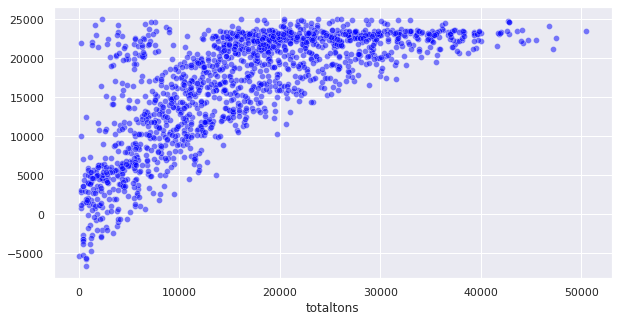

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))
sns.scatterplot(y_test,y_pred,color='blue',alpha=0.5)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


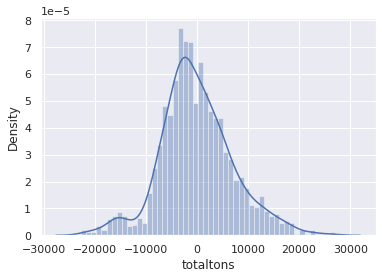

In [171]:
sns.distplot((y_test-y_pred),bins=50)

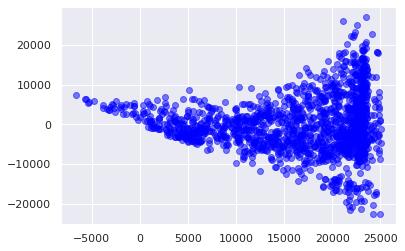

In [172]:
plt.scatter(y_pred,y_test-y_pred,c='blue',alpha=0.5)

In [173]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.5090349312156761

In [174]:
print(f'Error Cuadrático Medio: {metrics.mean_squared_error(y_test,y_pred)}')

Error Cuadrático Medio: 50886195.267460376


#Regresión logística

In [175]:
def rendimiento_efectivo(ton,time):
  if time == 0:
    return 0
  else:
    return ton/time

In [176]:
palas['rendimiento_efectivo'] = palas.apply(lambda row : rendimiento_efectivo(row.totaltons,row.tmcat01),axis=1)

In [177]:
palas['rendimiento_efectivo'].describe()

count    3819.000000
mean        0.615921
std         0.327523
min         0.000000
25%         0.443304
50%         0.586988
75%         0.806069
max        12.000000
Name: rendimiento_efectivo, dtype: float64

In [178]:
def check(valor):
  if valor >= 0.615921:
    return 1
  else:
    return 0

In [179]:
palas['rend_ef_bin'] = palas.apply(lambda row : check(row.rendimiento_efectivo),axis=1)

In [180]:
pd.DataFrame(palas.groupby(['rend_ef_bin']).count())

,shiftdate,shift#,eqmtid,totaltime,totaltons,tmcat01,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07,rendimiento_efectivo
rend_ef_bin,,,,,,,,,,,,,
0,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067
1,1752,1752,1752,1752,1752,1752,1752,1752,1752,1752,1752,1752,1752


In [181]:
turno = pd.get_dummies(palas['shift#'])

In [182]:
eqmtid = pd.get_dummies(palas['eqmtid'])

In [183]:
import datetime as dt
palas['shiftdate'] = pd.to_datetime(palas['shiftdate'])
palas['shiftdate'] = palas['shiftdate'].map(dt.datetime.toordinal)

In [184]:
train = pd.concat([palas.drop(['shift#','shiftdate','eqmtid','totaltons','tmcat01','rendimiento_efectivo'],axis=1),turno,eqmtid],axis=1)

In [185]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3819 entries, 23 to 13629
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   totaltime    3819 non-null   int64
 1   tmcat02      3819 non-null   int64
 2   tmcat03      3819 non-null   int64
 3   tmcat04      3819 non-null   int64
 4   tmcat05      3819 non-null   int64
 5   tmcat06      3819 non-null   int64
 6   tmcat07      3819 non-null   int64
 7   rend_ef_bin  3819 non-null   int64
 8   1            3819 non-null   uint8
 9   2            3819 non-null   uint8
 10  026          3819 non-null   uint8
 11  029          3819 non-null   uint8
 12  030          3819 non-null   uint8
 13  210          3819 non-null   uint8
 14  211          3819 non-null   uint8
 15  212          3819 non-null   uint8
 16  213          3819 non-null   uint8
 17  305          3819 non-null   uint8
 18  306          3819 non-null   uint8
 19  307          3819 non-null   uint8
 20  BUZON 

In [186]:
train.head(10)

,totaltime,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07,rend_ef_bin,1,2,026,029,030,210,211,212,213,305,306,307,BUZON
23,43200,0,814,3086,0,4132,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
25,43200,0,367,3466,33774,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
27,43200,0,3972,4192,0,4161,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
28,43200,0,10339,0,6049,1816,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
29,43200,0,6108,0,0,1772,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
6,43200,0,4935,0,0,1787,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
7,43200,0,4166,0,0,3556,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
5,43200,0,3981,0,0,3524,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
10,43200,0,8632,13462,0,1778,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
11,43200,0,728,42472,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [187]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('rend_ef_bin',axis=1),
                                                    train['rend_ef_bin'],
                                                    test_size=0.30,random_state=42)

In [188]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [189]:
y_pred = model.predict(X_test)

In [190]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       633
           1       0.85      0.82      0.83       513

    accuracy                           0.85      1146
   macro avg       0.85      0.85      0.85      1146
weighted avg       0.85      0.85      0.85      1146



In [191]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_pred)

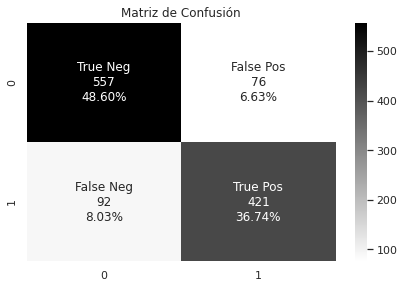

In [192]:
import numpy as np

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

class_names = [0,1]
# settings plot
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de Confusión', y=1.1)
# plot
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='binary')